In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from stop_words import get_stop_words
import re
from wordcloud import WordCloud
sns.set()

In [11]:
songs = pd.read_csv('../data/songs.csv')
songs = songs.drop(['Unnamed: 0'],axis=1)
songs.dropna(inplace=True)
songs.reset_index(drop=True,inplace=True)

In [12]:
def clean_text(text):
    #remove \n=
    text = text.replace('\n',' ')

    #remove... something
    text = re.sub(r'43embedshare urlcopyembedcopy','',text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

def gen_freq(text,nb_words=20):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.append(tw_words)

    #Create word frequencies using word_list
    stopwords = get_stop_words('fr',cache=False)
    word_freq = pd.Series(word_list).value_counts()
    word_freq = word_freq.drop(labels=stopwords, errors='ignore')
    
    word_freq[:nb_words]
    
    return word_freq

def all_lyrics():
    s=''
    for i in range(len(songs['lyrics'])):
        s = s.__add__(songs.loc[i,'cleaned_lyrics'])

    return s

def artist_lyrics(artist):
    s = ''
    for i in range(len(songs['lyrics'])):
        if songs.loc[i,'artist'] == artist:
          s += songs.loc[i,'cleaned_lyrics']
    return s

def lexdiv(lyrics):
    try:
        return len(set(lyrics.split()))/float(len(lyrics.split()))
    except:
        return 0

In [13]:
songs['cleaned_lyrics']= [clean_text(item) for item in songs['lyrics']]
songs

,title,release_date,artist,lyrics,cleaned_lyrics
0,"Demain, c’est loin",1997-03-18,IAM,"L'encre coule, le sang se répand ; la feuille ...",l'encre coule le sang se répand la feuille bu...
1,L’Empire du côté obscur,1997-03-18,IAM,"Un escalier de fer, un couloir étroit et obscu...",un escalier de fer un couloir étroit et obscur...
2,Petit Frère,1997-03-18,IAM,"""Life as... life as... life as... life as... l...","""life as life as life as life as life as life ..."
3,Nés sous la même étoile,1997-03-18,IAM,La vie est belle le destin s'en écarte\nPerson...,la vie est belle le destin s'en écarte personn...
4,L’École du micro d’argent,1997-03-18,IAM,L'école du micro d'argent\nL'école du micro d'...,l'école du micro d'argent l'école du micro d'a...
...,...,...,...,...,...
3067,Sportback,2020-10-16,4Keus,"Si demain, tout va bien\nMarcelino\nEnsemble, ...",si demain tout va bien marcelino ensemble on f...
3068,Frérot,2018-09-28,4Keus,"Frérot, frérot\nOn a fait des euros, euros\nJ'...",frérot frérot on a fait des euros euros j'suis...
3069,Freestyle LVC #3,2018-05-22,4Keus,"Fuck il, elle, tend tous la joue\nQuand y'a l'...",fuck il elle tend tous la joue quand y'a l'buz...
3070,Laisse tomber,2020-01-03,4Keus,"Je n’ai jamais donné ma langue aux keufs, et j...",je n’ai jamais donné ma langue aux keufs et j’...


In [20]:
from datetime import datetime

songs['age'] = [ (datetime.now() - datetime.strptime(x,'%Y-%m-%d')).days/365.25 for x in songs['release_date']]
songs = songs[songs['age'] < 35]
songs.reset_index(drop=True,inplace=True)

<ipython-input-20-b038854f40b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['age'] = [ (datetime.now() - datetime.strptime(x,'%Y-%m-%d')).days/365.25 for x in songs['release_date']]


In [21]:
songs['lexical_diversity'] = songs['cleaned_lyrics'].apply(lexdiv)
lexical_diversity = songs.groupby('artist')['lexical_diversity'].describe()
lexical_diversity

,count,mean,std,min,25%,50%,75%,max
artist,,,,,,,,
113,31.0,0.487257,0.059008,0.343708,0.455213,0.487663,0.516676,0.667532
2 Bal 2 Neg,16.0,0.544939,0.120786,0.427762,0.465348,0.504308,0.563109,0.878049
4Keus,49.0,0.415445,0.085020,0.278311,0.345372,0.416364,0.456818,0.653266
Agent Sasco (Assassin),14.0,0.410792,0.061741,0.316547,0.353165,0.422534,0.462572,0.500000
Akhenaton,43.0,0.535838,0.067132,0.431274,0.476552,0.531208,0.581245,0.692935
...,...,...,...,...,...,...,...,...
The Roots,48.0,0.458379,0.068072,0.297454,0.411902,0.451892,0.510498,0.665000
Vald,50.0,0.487522,0.079899,0.306324,0.430281,0.497863,0.542163,0.643606
X-Men,31.0,0.563229,0.118241,0.288618,0.505141,0.545205,0.605128,1.000000


In [22]:
artists = np.unique(songs['artist'])
artists

array(['113', '2 Bal 2 Neg', '4Keus', 'Agent Sasco (Assassin)',
       'Akhenaton', 'Alkpote', 'Alpha Wann', 'Bigflo & Oli', 'Blue Virus',
       'Booba', 'Bumblefoot', 'Busta Flex', 'Casseurs Flowters',
       'Columbine', 'Damso', 'Diam’s', 'Disiz La Peste', 'Doc Gynéco',
       'Dooz Kawa', 'Fabe', 'Fonky Family', 'Freeze Corleone',
       'Gaël Faye', 'Guizmo', 'Hocus Pocus', 'Hugo TSR', 'IAM', 'Ibeyi',
       'Ideal J', 'Ja Rule', 'Jazzy Bazz', 'JuL', 'Kaaris', 'Kaza',
       'Keny Arkana', 'Kery James', 'Klub des Loosers', 'La Caution',
       'La Rumeur', 'Lacrim', 'Laylow', 'Les Sages Poètes de la Rue',
       'Lino', 'Lomepal', 'Lucio Bukowski', 'Lunatic', 'MC Solaar', 'MRC',
       'Mafia K’1 Fry', 'Médine', 'Nakk Mendosa', 'Nekfeu', 'Nestor Kéa',
       'Ninho', 'Niska', 'Odezenne', 'OrelSan', 'Oxmo Puccino', 'PLK',
       'PNL', 'Rocca', 'Rohff', 'SCH', 'Saïan Supa Crew',
       'Scred Connexion', 'Scylla', 'Shurik’n', 'Sniper', 'Sofiane',
       'Stupeflip', 'Suprême NTM',

In [23]:
min_lexdiv = artists[lexical_diversity['mean'].argmin()]
max_lexdiv = artists[lexical_diversity['mean'].argmax()]
print((min_lexdiv,max_lexdiv))

('Ibeyi', 'Nestor Kéa')


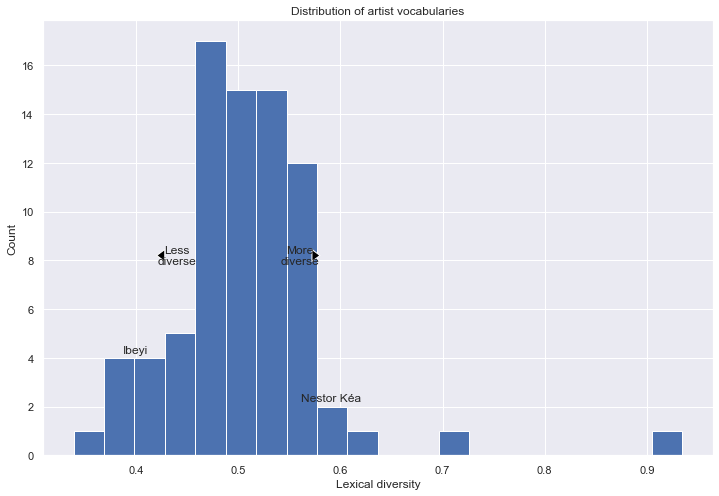

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(lexical_diversity['mean'],20)
ax.set_xlabel("Lexical diversity")
ax.set_ylabel("Count")
ax.set_title("Distribution of artist vocabularies")

ap = dict(facecolor='black', shrink=0.1, headlength=8)
# ax.annotate("",xy=(0.398,4.05), xytext=(0.397,5), arrowprops=ap)
ax.annotate("{}".format(min_lexdiv), xy=(0.399,4.2),
           horizontalalignment='center')
# ax.annotate("",xy=(0.59,2.1), xytext=(0.589,3), arrowprops=ap)            
ax.annotate("{}".format(max_lexdiv), xy=(0.591,2.2),
           horizontalalignment='center')

ax.annotate("Less\ndiverse", xy=(0.42,8.2), xytext=(0.44,8.2), arrowprops=ap,
            horizontalalignment='center',verticalalignment='center')
ax.annotate("More\ndiverse", xy=(0.58,8.2), xytext=(0.56,8.2), arrowprops=ap,
            horizontalalignment='center',verticalalignment='center')
plt.show()

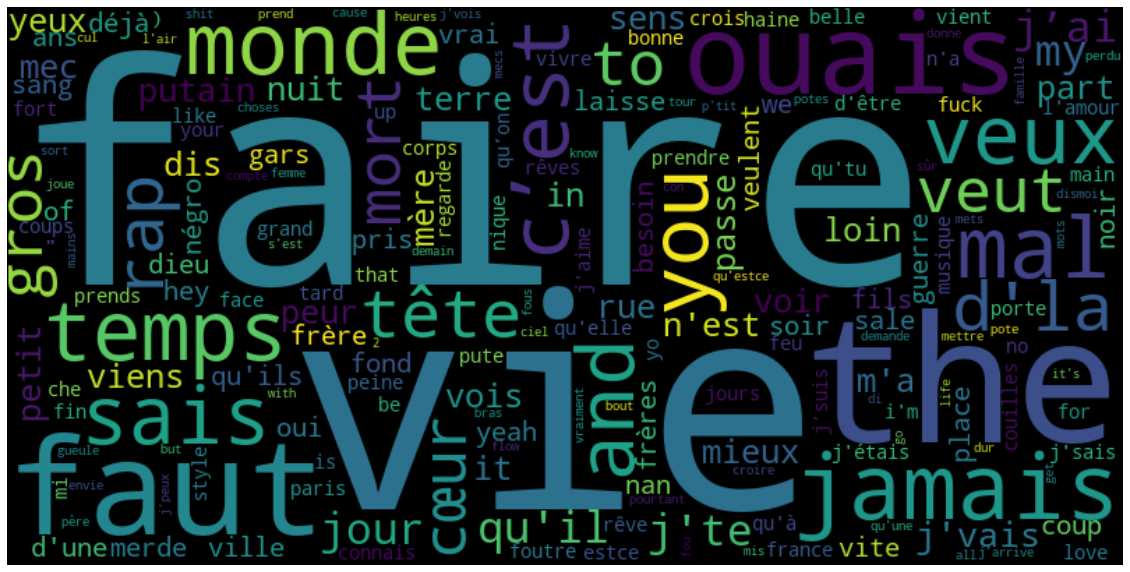

In [25]:
# Generate word clouds for all lyrics
wc1 = WordCloud(width=800,height=400).generate_from_frequencies(gen_freq(all_lyrics()))
plt.figure(figsize=(20,20))
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.show()

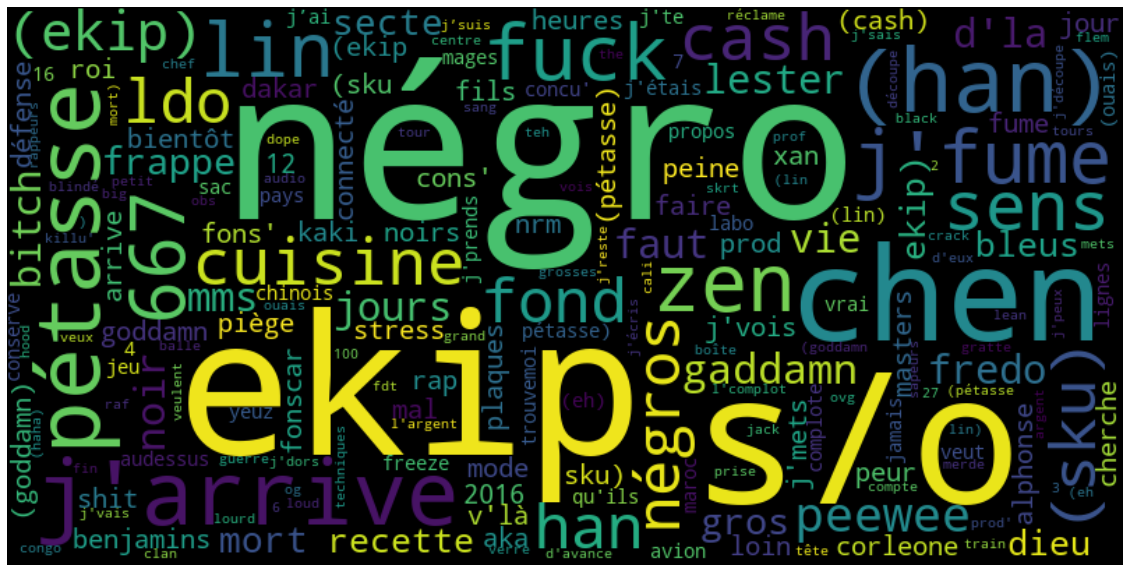

In [30]:
wc2 = WordCloud(width=800,height=400).generate_from_frequencies(gen_freq(artist_lyrics('Freeze Corleone')))
plt.figure(figsize=(20,20))
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='age', ylabel='lexical_diversity'>

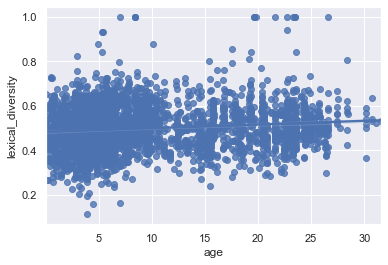

In [27]:
sns.regplot(x=songs['age'], y=songs['lexical_diversity'])